In [1]:
import cv2
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import Dependency
import Parameters
import math
from scipy.optimize import curve_fit

In [2]:
def log_fit(x, a, b, c):
    return a * np.exp(-b * x) + c

In [3]:
def log_fit_no_shift(x, a, b, c):
    return a * np.exp(-b * x) + 0

In [4]:
path =  os.getcwd()[:-5] + 'Analysis/probabilistic_analysis/Raw_for_analysis/'
df = pd.read_csv(path + 'vaccine_paper_2.csv')
groups = df.groupby('Source')
print(df)

            Source         Type                   Dose  Month  Week_start  \
0   Andrews et al.    BNT-162b2                 Dose 1    2.0           0   
1   Andrews et al.    BNT-162b2                 Dose 1    4.0           4   
2   Andrews et al.    BNT-162b2                 Dose 2    1.0           0   
3   Andrews et al.    BNT-162b2                 Dose 2    3.5           2   
4   Andrews et al.    BNT-162b2                 Dose 2    7.5           5   
..             ...          ...                    ...    ...         ...   
64             CDC  Unspecified                 Dose 2   20.0          20   
65             CDC  Unspecified  Booster (unspecified)    4.0           0   
66             CDC  Unspecified  Booster (unspecified)   12.0           8   
67             CDC  Unspecified  Booster (unspecified)   18.0          16   
68             CDC  Unspecified  Booster (unspecified)   20.0          20   

    Week_end  Effectiveness  Effectiveness_min  Effectiveness_max  
0      

In [5]:
dose21 = np.zeros(shape=(7 * 104, ))
dose21max = np.zeros(shape=(7 * 104, ))
dose21min = np.zeros(shape=(7 * 104, ))
dose31 = np.zeros(shape=(7 * 104,))
dose31max = np.zeros(shape=(7 * 104,))
dose31min = np.zeros(shape=(7 * 104,))

C:\Users\loveb\AppData\Local\Temp\ipykernel_48656\1855154499.py:33: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1), plt.plot(dose21), plt.plot(dose21max), plt.plot(dose21min)


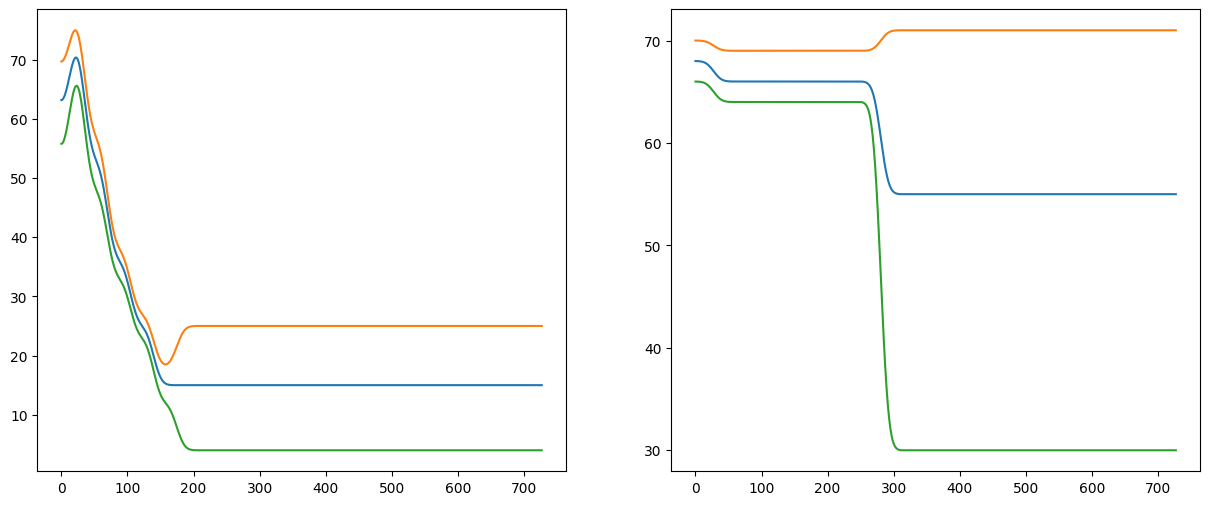

In [6]:
paper1 = groups.get_group('Andrews et al.')
paper2 = groups.get_group('Ferdinands et al.')
paper3 = groups.get_group('CDC')
for i in range(len(paper1)):
    row = paper1.iloc[i]
    start = int(row['Week_start'])
    if math.isnan(row['Week_end']):
        end = 104
    else:
        end = int(row['Week_end'])
    if row['Dose'] == 'Dose 1':
        pass
    elif row['Dose'] == 'Dose 2':
        dose21[start*7:end*7+1] = row['Effectiveness']
        dose21max[start*7:end*7+1] = row['Effectiveness_max']
        dose21min[start*7:end*7+1] = row['Effectiveness_min']
    else:
        dose31[start*7:end*7+1] = row['Effectiveness']
        dose31max[start*7:end*7+1] = row['Effectiveness_max']
        dose31min[start*7:end*7+1] = row['Effectiveness_min']
    # print(start*7, end*7+1)
    # print(dose3[725])

dose21 = np.reshape(cv2.GaussianBlur(dose21.reshape(7 * 104, 1), (61, 61), 0), newshape=(7 * 104,))
dose21max = np.reshape(cv2.GaussianBlur(dose21max.reshape(7 * 104, 1), (61, 61), 0), newshape=(7 * 104,))
dose21min = np.reshape(cv2.GaussianBlur(dose21min.reshape(7 * 104, 1), (61, 61), 0), newshape=(7 * 104,))
dose31 = np.reshape(cv2.GaussianBlur(dose31.reshape(7 * 104, 1), (61, 61), 0), newshape=(7 * 104,))
dose31max = np.reshape(cv2.GaussianBlur(dose31max.reshape(7 * 104, 1), (61, 61), 0), newshape=(7 * 104,))
dose31min = np.reshape(cv2.GaussianBlur(dose31min.reshape(7 * 104, 1), (61, 61), 0), newshape=(7 * 104,))

plt.figure(figsize=(15,6))
plt.subplot()
plt.subplot(1, 2, 1), plt.plot(dose21), plt.plot(dose21max), plt.plot(dose21min)
plt.subplot(1, 2, 2), plt.plot(dose31), plt.plot(dose31max), plt.plot(dose31min)
plt.show()

In [7]:
dose22 = np.zeros(shape=(7 * 104, ))
dose32 = np.zeros(shape=(7 * 104,))
dose22max = np.zeros(shape=(7 * 104, ))
dose32max = np.zeros(shape=(7 * 104,))
dose22min = np.zeros(shape=(7 * 104, ))
dose32min = np.zeros(shape=(7 * 104,))

C:\Users\loveb\AppData\Local\Temp\ipykernel_48656\3492931469.py:34: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1), plt.plot(dose22), plt.plot(dose22max), plt.plot(dose22min)


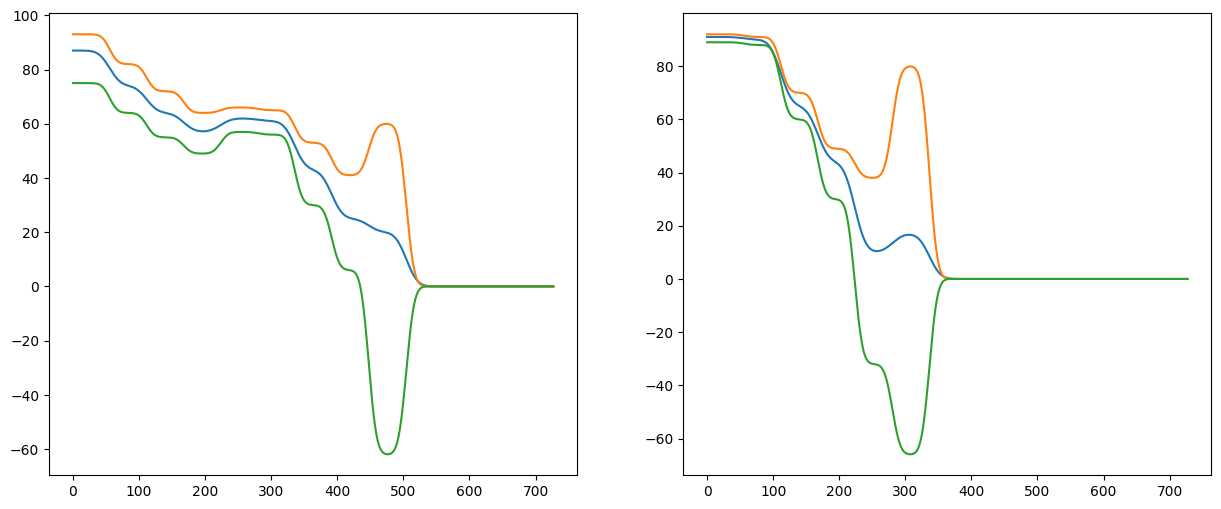

In [8]:
for i in range(len(paper2)):
    row = paper2.iloc[i]
    start = int(row['Week_start'])
    if math.isnan(row['Week_end']):
        end = 104
    else:
        end = int(row['Week_end'])
    if row['Dose'] == 'Dose 1':
        pass
    elif row['Dose'] == 'Dose 2':
        dose22[start*7:end*7+1] = row['Effectiveness']
        dose22max[start*7:end*7+1] = row['Effectiveness_max']
        dose22min[start*7:end*7+1] = row['Effectiveness_min']
    else:
        dose32[start*7:end*7+1] = row['Effectiveness']
        dose32max[start*7:end*7+1] = row['Effectiveness_max']
        dose32min[start*7:end*7+1] = row['Effectiveness_min']

dose22 = np.reshape(cv2.GaussianBlur(dose22.reshape(7 * 104, 1), (61, 61), 0), newshape=(7 * 104,))
dose22max = np.reshape(cv2.GaussianBlur(dose22max.reshape(7 * 104, 1), (61, 61), 0), newshape=(7 * 104,))
dose22min = np.reshape(cv2.GaussianBlur(dose22min.reshape(7 * 104, 1), (61, 61), 0), newshape=(7 * 104,))
dose32 = np.reshape(cv2.GaussianBlur(dose32.reshape(7 * 104, 1), (61, 61), 0), newshape=(7 * 104,))
dose32max = np.reshape(cv2.GaussianBlur(dose32max.reshape(7 * 104, 1), (61, 61), 0), newshape=(7 * 104,))
dose32min = np.reshape(cv2.GaussianBlur(dose32min.reshape(7 * 104, 1), (61, 61), 0), newshape=(7 * 104,))



dose22 = np.reshape(cv2.GaussianBlur(dose22.reshape(dose22.shape[0], 1), (61, 61), 0), newshape=(dose22.shape[0], ))
dose32 = np.reshape(cv2.GaussianBlur(dose32.reshape(dose32.shape[0], 1), (61, 61), 0), newshape=(dose32.shape[0], ))


plt.figure(figsize=(15,6))
plt.subplot()
plt.subplot(1, 2, 1), plt.plot(dose22), plt.plot(dose22max), plt.plot(dose22min)
plt.subplot(1, 2, 2), plt.plot(dose32), plt.plot(dose32max), plt.plot(dose32min)
plt.show()


In [9]:
dose23 = np.zeros(shape=(7 * 104,))
dose33 = np.zeros(shape=(7 * 104,))
dose23max = np.zeros(shape=(7 * 104,))
dose33max = np.zeros(shape=(7 * 104,))
dose23min = np.zeros(shape=(7 * 104,))
dose33min = np.zeros(shape=(7 * 104,))

C:\Users\loveb\AppData\Local\Temp\ipykernel_48656\1949608217.py:30: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1), plt.plot(dose23), plt.plot(dose23max), plt.plot(dose23min)


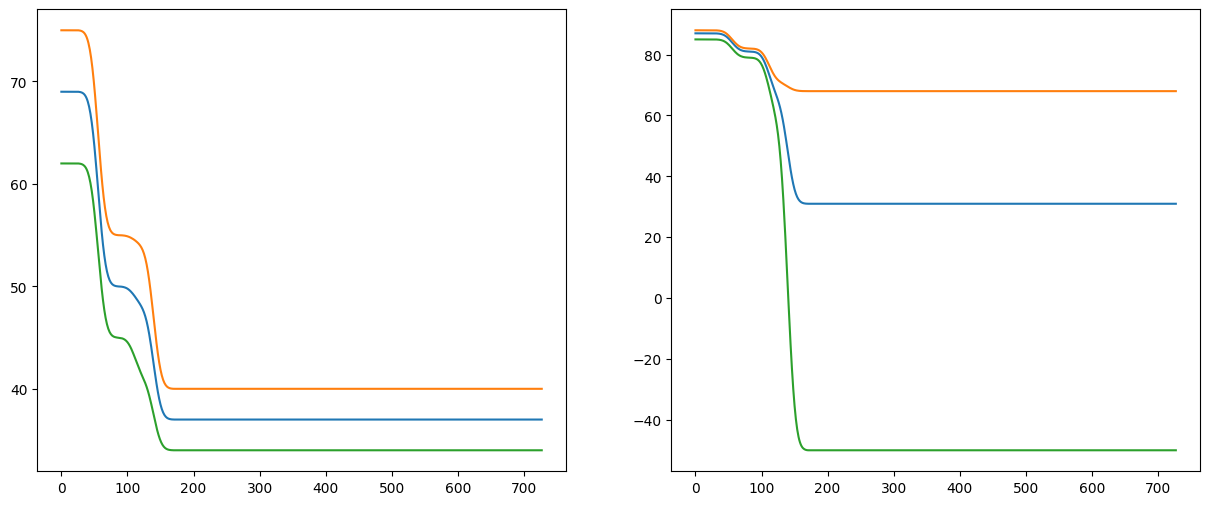

In [24]:
for i in range(len(paper3)):
    row = paper3.iloc[i]
    start = int(row['Week_start'])
    if math.isnan(row['Week_end']):
        end = 104
    else:
        end = int(row['Week_end'])
    if row['Dose'] == 'Dose 1':
        pass
    elif row['Dose'] == 'Dose 2':
        dose23[start*7:end*7+1] = row['Effectiveness']
        dose23max[start*7:end*7+1] = row['Effectiveness_max']
        dose23min[start*7:end*7+1] = row['Effectiveness_min']
    else:
        dose33[start*7:end*7+1] = row['Effectiveness']
        dose33max[start*7:end*7+1] = row['Effectiveness_max']
        dose33min[start*7:end*7+1] = row['Effectiveness_min']
    # print(start*7, end*7+1)
    # print(dose3[725])

dose23 = np.reshape(cv2.GaussianBlur(dose23.reshape(7 * 104, 1), (61, 61), 0), newshape=(7 * 104,))
dose23max = np.reshape(cv2.GaussianBlur(dose23max.reshape(7 * 104, 1), (61, 61), 0), newshape=(7 * 104,))
dose23min = np.reshape(cv2.GaussianBlur(dose23min.reshape(7 * 104, 1), (61, 61), 0), newshape=(7 * 104,))
dose33 = np.reshape(cv2.GaussianBlur(dose33.reshape(7 * 104, 1), (61, 61), 0), newshape=(7 * 104,))
dose33max = np.reshape(cv2.GaussianBlur(dose33max.reshape(7 * 104, 1), (61, 61), 0), newshape=(7 * 104,))
dose33min = np.reshape(cv2.GaussianBlur(dose33min.reshape(7 * 104, 1), (61, 61), 0), newshape=(7 * 104,))

plt.figure(figsize=(15,6))
plt.subplot()
plt.subplot(1, 2, 1), plt.plot(dose23), plt.plot(dose23max), plt.plot(dose23min)
plt.subplot(1, 2, 2), plt.plot(dose33), plt.plot(dose33max), plt.plot(dose33min)
plt.show()

C:\Users\loveb\AppData\Local\Temp\ipykernel_48656\3139648876.py:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1), plt.plot(dose2)


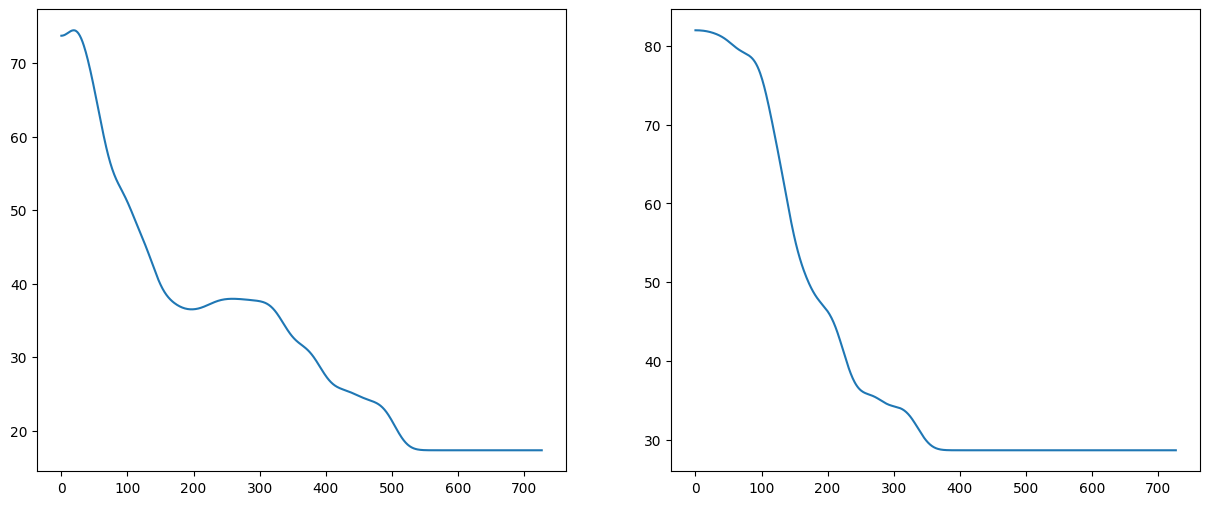

In [26]:
dose2 = np.zeros(shape=(7 * 104, ))
dose3 = np.zeros(shape=(7 * 104,))

shortest2 = min(dose21.shape[0], dose22.shape[0], dose23.shape[0])

dose2[:shortest2] = np.mean(np.concatenate([dose21[:shortest2].reshape(shortest2, 1), dose22[:shortest2].reshape(shortest2, 1), dose23[:shortest2].reshape(shortest2, 1)], axis=1), axis=1)

dose2[shortest2:dose22.shape[0]] = np.mean(np.concatenate([dose21[shortest2:dose22.shape[0]].reshape(dose22.shape[0] - shortest2, 1), dose22[shortest2:dose22.shape[0]].reshape(dose22.shape[0] - shortest2, 1)], axis=1), axis=1)

# dose2[:shortest2] = np.mean(np.concatenate([dose22[:shortest2].reshape(shortest2, 1), dose21[:shortest2].reshape(shortest2, 1)], axis=1), axis=1)
#
# dose2[shortest2:dose22.shape[0]] = dose2[shortest2:dose22.shape[0]]
#
# dose2[dose22.shape[0]:] = dose22[dose22.shape[0]:]


shortest3 = min(dose31.shape[0], dose32.shape[0], dose33.shape[0])

dose3[:shortest3] = np.mean(np.concatenate([dose31[:shortest3].reshape(shortest3, 1), dose32[:shortest3].reshape(shortest3, 1), dose33[:shortest3].reshape(shortest3, 1)], axis=1), axis=1)

dose3[shortest3:dose32.shape[0]] = np.mean(np.concatenate([dose21[shortest3:dose32.shape[0]].reshape(dose32.shape[0] - shortest3, 1), dose32[shortest3:dose32.shape[0]].reshape(dose32.shape[0] - shortest2, 1)], axis=1), axis=1)


dose2 = np.reshape(cv2.GaussianBlur(dose2.reshape(dose2.shape[0], 1), (61, 61), 0), newshape=(dose3.shape[0], ))
dose3 = np.reshape(cv2.GaussianBlur(dose3.reshape(dose3.shape[0], 1), (61, 61), 0), newshape=(dose33.shape[0], ))

plt.figure(figsize=(15,6))
plt.subplot()
plt.subplot(1, 2, 1), plt.plot(dose2)
plt.subplot(1, 2, 2), plt.plot(dose3)
plt.show()

C:\Users\loveb\AppData\Local\Temp\ipykernel_48656\3016181588.py:44: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1), plt.plot(dose2max), plt.plot(dose2min)


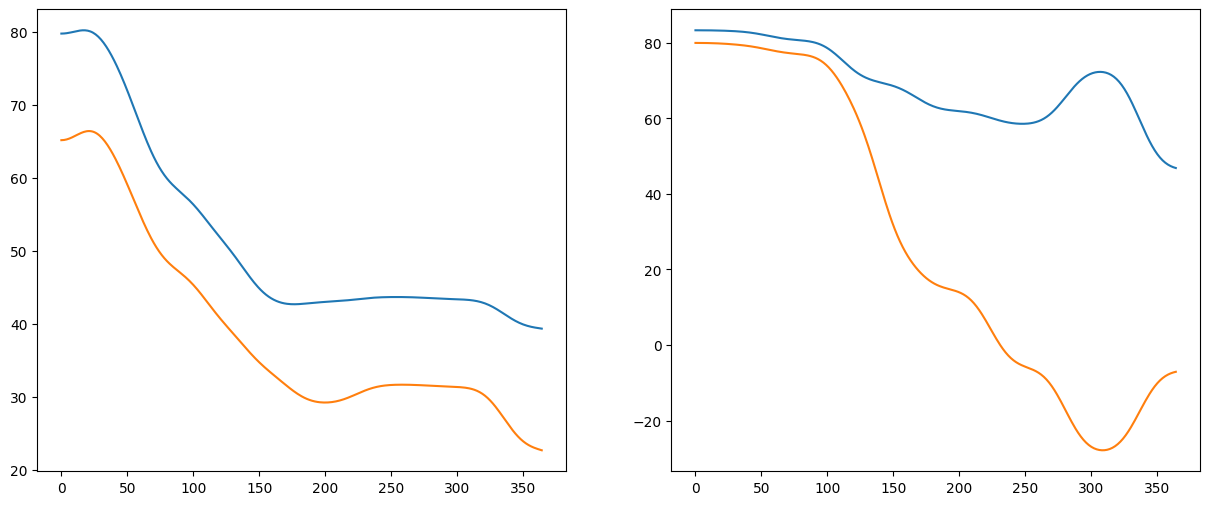

In [27]:
dose2max = np.zeros(shape=(7 * 104, ))
dose3max = np.zeros(shape=(7 * 104,))
dose2min = np.zeros(shape=(7 * 104, ))
dose3min = np.zeros(shape=(7 * 104,))

dose2max[:shortest2] = np.mean(np.concatenate([dose21max[:shortest2].reshape(shortest2, 1), dose22max[:shortest2].reshape(shortest2, 1), dose23max[:shortest2].reshape(shortest2, 1)], axis=1), axis=1)

dose2max[shortest2:dose22max.shape[0]] = np.mean(np.concatenate([dose21max[shortest2:dose22max.shape[0]].reshape(dose22max.shape[0] - shortest2, 1), dose22max[shortest2:dose22max.shape[0]].reshape(dose22max.shape[0] - shortest2, 1)], axis=1), axis=1)

dose2max[dose22max.shape[0]:] = dose21max[dose22max.shape[0]:]


shortest3 = min(dose31max.shape[0], dose32max.shape[0], dose33max.shape[0])


dose3max[:shortest3] = np.mean(np.concatenate([dose31max[:shortest3].reshape(shortest3, 1), dose32max[:shortest3].reshape(shortest3, 1), dose33max[:shortest3].reshape(shortest3, 1)], axis=1), axis=1)

dose3max[shortest3:dose32max.shape[0]] = np.mean(np.concatenate([dose21max[shortest3:dose32max.shape[0]].reshape(dose32max.shape[0] - shortest3, 1), dose32max[shortest3:dose32max.shape[0]].reshape(dose32max.shape[0] - shortest2, 1)], axis=1), axis=1)

dose2min[:shortest2] = np.mean(np.concatenate([dose21min[:shortest2].reshape(shortest2, 1), dose22min[:shortest2].reshape(shortest2, 1), dose23min[:shortest2].reshape(shortest2, 1)], axis=1), axis=1)

dose2min[shortest2:dose22min.shape[0]] = np.mean(np.concatenate([dose21min[shortest2:dose22min.shape[0]].reshape(dose22min.shape[0] - shortest2, 1), dose22min[shortest2:dose22min.shape[0]].reshape(dose22min.shape[0] - shortest2, 1)], axis=1), axis=1)

dose2min[dose22min.shape[0]:] = dose21min[dose22min.shape[0]:]


shortest3 = min(dose31min.shape[0], dose32min.shape[0], dose33min.shape[0])


dose3min[:shortest3] = np.mean(np.concatenate([dose31min[:shortest3].reshape(shortest3, 1), dose32min[:shortest3].reshape(shortest3, 1), dose33min[:shortest3].reshape(shortest3, 1)], axis=1), axis=1)

dose3min[shortest3:dose32min.shape[0]] = np.mean(np.concatenate([dose21min[shortest3:dose32min.shape[0]].reshape(dose32min.shape[0] - shortest3, 1), dose32min[shortest3:dose32min.shape[0]].reshape(dose32min.shape[0] - shortest2, 1)], axis=1), axis=1)


dose2max = np.reshape(cv2.GaussianBlur(dose2max.reshape(dose2max.shape[0], 1), (61, 61), 0), newshape=(dose2max.shape[0], ))[:365]
dose3max = np.reshape(cv2.GaussianBlur(dose3max.reshape(dose3max.shape[0], 1), (61, 61), 0), newshape=(dose3max.shape[0], ))[:365]

dose2min = np.reshape(cv2.GaussianBlur(dose2min.reshape(dose2min.shape[0], 1), (61, 61), 0), newshape=(dose2min.shape[0], ))[:365]
dose3min = np.reshape(cv2.GaussianBlur(dose3min.reshape(dose3min.shape[0], 1), (61, 61), 0), newshape=(dose3min.shape[0], ))[:365]


plt.figure(figsize=(15,6))
plt.subplot()
plt.subplot(1, 2, 1), plt.plot(dose2max), plt.plot(dose2min)
plt.subplot(1, 2, 2), plt.plot(dose3max), plt.plot(dose3min)
plt.show()

range(0, 728)


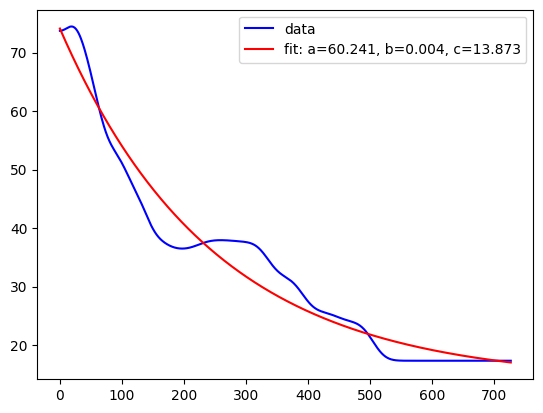

ValueError: cannot reshape array of size 365 into shape (728,1)

In [28]:
xdata = range(0, dose2.shape[0])
print(xdata)
ydata = dose2
popt, pcov = curve_fit(log_fit, xdata, ydata,  bounds=(0, [100, 10, 100]))
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, log_fit(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
# plt.fill_between(xdata, dose2min, dose2max)
plt.legend()
plt.show()

dose2data = np.concatenate([dose2.reshape(dose2.shape[0], 1), dose2min.reshape(dose2.shape[0], 1), dose2max.reshape(dose2.shape[0], 1), log_fit(xdata, *popt).reshape(365, 1)], axis=1) / 100

dose2andrew = np.concatenate([dose21[:365].reshape(365, 1), dose21min[:365].reshape(365, 1), dose21max[:365].reshape(365, 1), log_fit(xdata, *popt).reshape(365, 1)], axis=1) / 100

dose2ferdin = np.concatenate([dose22[:365].reshape(365, 1), dose22min[:365].reshape(365, 1), dose22max[:365].reshape(365, 1), log_fit(xdata, *popt).reshape(365, 1)], axis=1) / 100

dose2cdc =  np.concatenate([dose23[:365].reshape(365, 1), dose23min[:365].reshape(365, 1), dose23max[:365].reshape(365, 1), log_fit(xdata, *popt).reshape(365, 1)], axis=1) / 100

second_dose_df = pd.DataFrame(data=dose2data, columns=['mean', 'mean_min', 'mean_max', 'predicted'])
second_dose_df_andrew = pd.DataFrame(data=dose2andrew, columns=['mean', 'mean_min', 'mean_max', 'predicted'])
second_dose_df_ferdin = pd.DataFrame(data=dose2ferdin, columns=['mean', 'mean_min', 'mean_max', 'predicted'])
second_dose_df_cdc = pd.DataFrame(data=dose2cdc, columns=['mean', 'mean_min', 'mean_max', 'predicted'])

dose2_df = pd.concat([second_dose_df, second_dose_df_andrew, second_dose_df_ferdin, second_dose_df_cdc], keys=['mean', 'Andrews_et_al', 'Ferdinands_et_al', 'CDC'])

# second_dose_df = pd.DataFrame(data=dose2data, columns=['mean', 'mean_min', 'mean_max', 'predicted', 'Andrews et al.', 'Andrews et al. max', 'Andrews et al. min', 'Ferdinands et al.','Ferdinands et al. max','Ferdinands et al. min', 'CDC', 'CDC max', 'CDC min'])

path =  os.getcwd()[:-5] + 'Analysis/probabilistic_analysis/Infereced_data/'

#second_dose_df.to_csv(path + 'Dose2.csv')

range(0, 728)


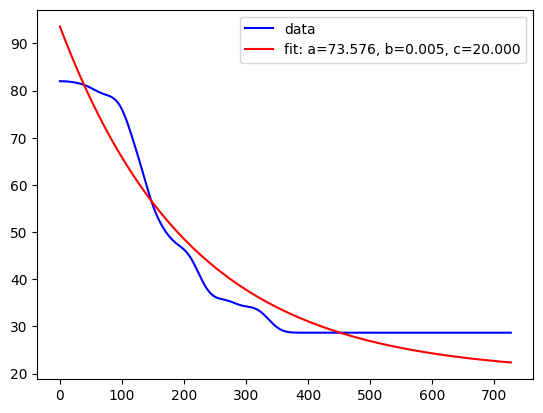

ValueError: cannot reshape array of size 365 into shape (728,1)

In [33]:
xdata = range(0, dose3.shape[0])
print(xdata)
ydata = dose3
popt, pcov = curve_fit(log_fit, xdata, ydata, bounds=(0, [1000, 10, 20]))
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, log_fit(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
# plt.fill_between(xdata, dose3min, dose3max)
plt.legend()
plt.show()

dose3data = np.concatenate([dose3.reshape(dose3.shape[0], 1), dose3min.reshape(dose3.shape[0], 1), dose3max.reshape(dose3.shape[0], 1), log_fit(xdata, *popt).reshape(dose3.shape[0], 1)], axis=1) / 100

# dose3data = np.concatenate([dose3.reshape(dose3.shape[0], 1), dose3min.reshape(dose3.shape[0], 1), dose3max.reshape(dose3.shape[0], 1), log_fit(xdata, *popt).reshape(dose3.shape[0], 1), dose31[:365].reshape(365, 1), dose31max[:365].reshape(365, 1), dose31min[:365].reshape(365, 1), dose32[:365].reshape(365, 1), dose32max[:365].reshape(365, 1), dose32min[:365].reshape(365, 1), dose33[:365].reshape(365, 1), dose33max[:365].reshape(365, 1), dose33min[:365].reshape(365, 1)], axis=1) / 100


# third_dose_df = pd.DataFrame(data=dose3data, columns=['mean', 'mean_min', 'mean_max', 'predicted', 'Andrews et al.', 'Andrews et al. max', 'Andrews et al. min', 'Ferdinands et al.','Ferdinands et al. max','Ferdinands et al. min', 'CDC', 'CDC max', 'CDC min'])

path =  os.getcwd()[:-5] + 'Analysis/probabilistic_analysis/Infereced_data/'

dose3data = np.concatenate([dose3.reshape(dose3.shape[0], 1), dose3min.reshape(dose3.shape[0], 1), dose3max.reshape(dose3.shape[0], 1), log_fit(xdata, *popt).reshape(365, 1)], axis=1) / 100

dose3andrew = np.concatenate([dose31[:365].reshape(365, 1), dose31min[:365].reshape(365, 1), dose31max[:365].reshape(365, 1), log_fit(xdata, *popt).reshape(365, 1)], axis=1) / 100

dose3ferdin = np.concatenate([dose32[:365].reshape(365, 1), dose32min[:365].reshape(365, 1), dose32max[:365].reshape(365, 1), log_fit(xdata, *popt).reshape(365, 1)], axis=1) / 100

dose3cdc =  np.concatenate([dose33[:365].reshape(365, 1), dose33min[:365].reshape(365, 1), dose33max[:365].reshape(365, 1), log_fit(xdata, *popt).reshape(365, 1)], axis=1) / 100

third_dose_df = pd.DataFrame(data=dose3data, columns=['mean', 'mean_min', 'mean_max', 'predicted'])
third_dose_df_andrew = pd.DataFrame(data=dose3andrew, columns=['mean', 'mean_min', 'mean_max', 'predicted'])
third_dose_df_ferdin = pd.DataFrame(data=dose3ferdin, columns=['mean', 'mean_min', 'mean_max', 'predicted'])
third_dose_df_cdc = pd.DataFrame(data=dose3cdc, columns=['mean', 'mean_min', 'mean_max', 'predicted'])

dose3_df = pd.concat([third_dose_df, third_dose_df_andrew, third_dose_df_ferdin, third_dose_df_cdc], keys=['mean', 'Andrews_et_al', 'Ferdinands_et_al', 'CDC'])


#third_dose_df.to_csv(path + 'Dose3.csv')

In [ ]:
concatenated = pd.concat([dose2_df, dose3_df], keys=['Dose 2', 'Dose 3'])

path =  os.getcwd()[:-5] + 'Analysis/probabilistic_analysis/Infereced_data/'

concatenated.to_csv(path + 'Vaccine_effectiveness.csv')

In [ ]:
TWO_DOSE_EFFICACY = np.multiply( log_fit(np.linspace(0, 1999, 2000),a=62.715, b=0.004, c=10).reshape(2000, 1), np.ones(shape=(16, 1)).T)
THREE_DOSE_EFFICACY = np.multiply( log_fit(np.linspace(0, 1999, 2000), a=93.327, b=0.003, c=0).reshape(2000, 1), np.ones(shape=(16, 1)).T)
INFECTION_IMMUNITY = np.multiply( log_fit(np.linspace(0, 1999, 2000), a=100, b=0.002, c=0).reshape(2000, 1), np.ones(shape=(16, 1)).T)
plt.plot(TWO_DOSE_EFFICACY)
plt.plot(THREE_DOSE_EFFICACY)
plt.plot(INFECTION_IMMUNITY, color='black')
plt.show()
f = np.ones(shape=(16, ))